# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [6]:
def rollTheDice():
    # set dice possibilities
    dice = list(range(1,7))

    # Create data dictionary
    data = {'results': random.choices(dice, k=10)}

    # Transform dictionary into a data frame
    df = pd.DataFrame(data)
    return df

,results
0,6
1,3
2,5
3,5
4,3
5,4
6,3
7,2
8,2
9,4


#### 2.- Plot the results sorted by value.

In [9]:
# your code here
df.sort_values(by='results', inplace=True)

<AxesSubplot:>

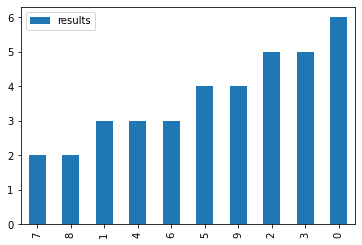

In [10]:
df.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [38]:
#calculate frequency distribution
freq_dist = df.copy()
#add a column with count 1 for each roll
freq_dist['freq']= 1
#create freq df
freq_dist = freq_dist.groupby('results', as_index=False).agg({'freq':'sum'})

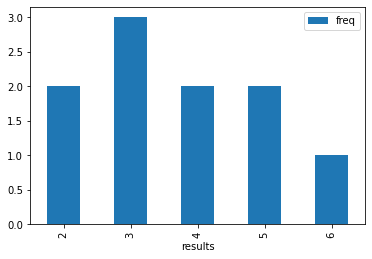

In [37]:
# plot the frequency distribution
freq_dist.plot.bar(x='results', y='freq')
plt.show()

In [ ]:
"""
in both plot we can have a sense of what number has been drown the most and how many times
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here

def mean(dataframe):
    sum_observations = 0
    total_observations = len(dataframe)
    for i in range(len(dataframe)):
        sum_observations += dataframe['results'][i]
    mean = sum_observations / total_observations
    return mean

In [28]:
mean(df)

3.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
def mean2(dataframe):
    df_freq = dataframe.copy()
    df_freq['freq']= 1
    df_freq = df_freq.groupby('results', as_index=False).agg({'freq':'sum'})

    sum_obs = 0
    total_observations = 0

    for i in range(len(df_freq)):
        sum_obs += df_freq['results'][i]*df_freq['freq'][i]
        total_observations += df_freq['freq'][i]
    mean = sum_obs / total_observations
    return mean

In [42]:
mean2(df)

3.7

In [133]:
df

,results
0,6
2,5
3,5
5,4
9,4
1,3
4,3
6,3
7,2
8,2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [190]:
# Calculating median

#sort observations
def median():
    df.sort_values(by='results', ascending=False, inplace=True)

    if len(df) %2 != 0:
        median = df['results'][((len(df)+1)/2)-1]
    else:
        median = (df['results'][((len(df))/2)-1] + df['results'][(len(df)/2)])/2
    return median

In [191]:
median()

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [156]:
df.sort_values(by='results', inplace=True)
df

,results
7,2
8,2
1,3
4,3
6,3
5,4
9,4
2,5
3,5
0,6


In [238]:
# your code here
def median(data):
    data = data.sort_values(by='results', ascending=True)
    len_df = len(data)
    if len_df %2 != 0:
        median = data.iloc[(len_df+1)/2-1]
    else:
        median = (data.iloc[int((len_df/2)-1)] + data.iloc[int(len_df/2)])/2
    return median

In [236]:
def find_Q1(dataframe):
    half_list = int(len(dataframe)//2)+1
    df_q3 = df[:half_list]
    df_q1 = df[half_list:]
    print('Q3: ',median(df_q3))
    print('Q1: ',median(df_q1))

In [237]:
find_Q1(df)

Q3:  results    4.5
dtype: float64
Q1:  results    2.5
dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [61]:
# your code here
dice = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_hundred.csv')

<AxesSubplot:>

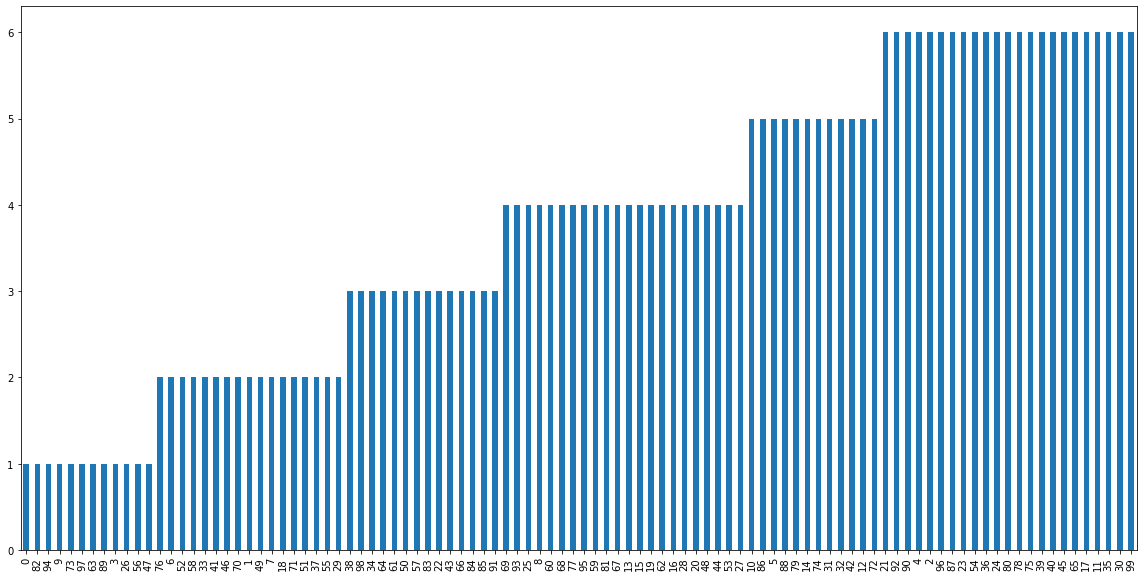

In [71]:
dice.sort_values(by='value', inplace=True)
dice['value'].plot.bar(figsize=(20,10))

In [ ]:
"""
I see every roll sorted by value = 3 and 6 seems to be the most frequent results
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [73]:
# mean
def mean(dataframe):
    sum_observations = 0
    total_observations = len(dataframe)
    for i in range(len(dataframe)):
        sum_observations += dataframe['value'][i]
    mean = sum_observations / total_observations
    return mean

In [76]:
mean(dice)

3.74

#### 3.- Now, calculate the frequency distribution.


In [80]:
# frequency distribution
dice_freq = dice.groupby('value').agg({'value':'count'})
dice_freq = dice_freq.rename(columns={"value": "freq"})
dice_freq

,freq
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value', ylabel='Count'>

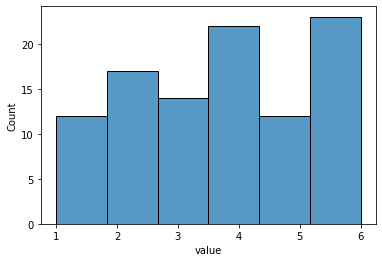

In [94]:
# your code here
sns.histplot(data=dice, x='value', bins=6)

In [ ]:
"""
not a normal distribution, we see significant differences in frequence between the values
the mean seems to be at the center of histogram"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [95]:
# your code here
dice_thousand = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_thousand.csv')

<AxesSubplot:xlabel='value', ylabel='Count'>

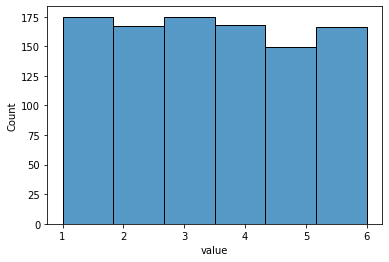

In [96]:
sns.histplot(data=dice_thousand, x='value', bins=6)

In [ ]:
"""
the distibution shape is more flat, freq evenly distributed, and mean probably around 3.5
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [97]:
# your code here
age_population = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population.csv')

<AxesSubplot:xlabel='observation', ylabel='Count'>

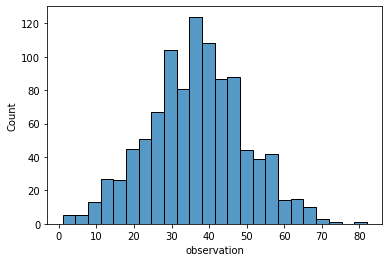

In [99]:
age_population
sns.histplot(data=age_population, x='observation')

In [ ]:
'''mean : 35-40
median : 35-40
standard deviation : 13'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [104]:
# your code here
print('mean: ',age_population.mean())
print('median: ',age_population.median())
print('standard deviation: ',age_population.std())


mean:  observation    36.56
dtype: float64
median:  observation    37.0
dtype: float64
standard deviation:  observation    12.8165
dtype: float64


In [ ]:
"""
my estimations were correct"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [106]:
# your code here
age_population2 = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population2.csv')

<AxesSubplot:xlabel='observation', ylabel='Count'>

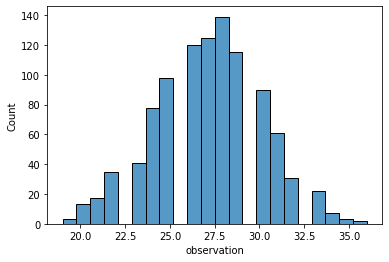

In [108]:
sns.histplot(data=age_population2, x='observation')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
data seems missing but the overall shape of distribution is the same"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [109]:
# your code here
print('mean: ',age_population2.mean())
print('median: ',age_population2.median())
print('standard deviation: ',age_population2.std())

mean:  observation    27.155
dtype: float64
median:  observation    27.0
dtype: float64
standard deviation:  observation    2.969814
dtype: float64


In [ ]:
"""
according to median and mean, population seems younger by 10 years, the standard deviation is significantly lower"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [110]:
# your code here
age_population3 = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population3.csv')

<AxesSubplot:xlabel='observation', ylabel='Count'>

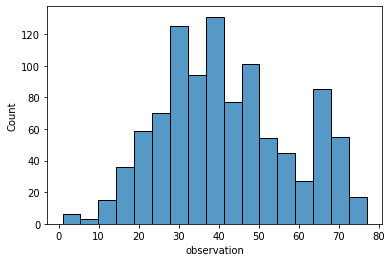

In [111]:
sns.histplot(data=age_population3, x='observation')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [112]:
# your code here
print('mean: ',age_population3.mean())
print('median: ',age_population3.median())
print('standard deviation: ',age_population3.std())

mean:  observation    41.989
dtype: float64
median:  observation    40.0
dtype: float64
standard deviation:  observation    16.144706
dtype: float64


In [ ]:
"""
the population is older (3-4 yo) and standard deviation greater by 3"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [117]:
# your code here
Q1 = age_population3.quantile(0.25)
Q2 = age_population3.quantile(0.5)
Q3 = age_population3.quantile(0.75)
print(Q1)
print(Q2)
print(Q3)

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64


In [119]:
"""
50% of population is between 30 and 53 yo, we can see can see that the distribution is a little 
skewed to the right which explains that the mean is greater by 2 than the median"""

'50% of population is between 30 and 53 yo, \nwe can see that the distribution is a little skewed to the right which explains '

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [123]:
# your code here
q10 = age_population3.quantile(0.10)
q20 = age_population3.quantile(0.20)
q30 = age_population3.quantile(0.30)
q40 = age_population3.quantile(0.40)
q50 = age_population3.quantile(0.50)
q60 = age_population3.quantile(0.60)
q70 = age_population3.quantile(0.70)
q80 = age_population3.quantile(0.80)
q90 = age_population3.quantile(0.90)
print(q10,q20,q30,q40,q50,q60,q70,q80,q90)

observation    22.0
Name: 0.1, dtype: float64 observation    28.0
Name: 0.2, dtype: float64 observation    32.0
Name: 0.3, dtype: float64 observation    36.0
Name: 0.4, dtype: float64 observation    40.0
Name: 0.5, dtype: float64 observation    45.0
Name: 0.6, dtype: float64 observation    50.0
Name: 0.7, dtype: float64 observation    57.0
Name: 0.8, dtype: float64 observation    67.0
Name: 0.9, dtype: float64


In [124]:
"""
we can see with percentiles that the distribution is more concentrated on the left of the median. 10% of population is between 28 and 32 yo while 10% percent are btw 57 and 67 yo
"""

'\nwe can see with percentiles that the distribution is more concentrated on the left of the median. 10% of population is between 28 and 32 yo while 10% percent are btw 57 and 67 yo\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""